# Self-Driving Car Engineer Nanodegree


## Project: Build a Traffic Sign Recognition Classifier

In this project, deep neural networks and convolutional neural networks were used to classify traffic signs. I have trained and validated the model so it can classify traffic sign images using the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). After the model is trained, I then tried out my model on images of German traffic signs which I downloaded from the web.

---
## Step 0: Load The Data

In [1]:
# Import pickle library to serialize and de-serialize the data
import pickle

# Path to training, testing and validation data
training_filepath = '../data/train.p'
validation_filepath='../data/valid.p'
testing_filepath = '../data/test.p'

# Load the training, testing and validation data
with open(training_filepath, mode='rb') as f:
    train = pickle.load(f)
with open(validation_filepath, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_filepath, mode='rb') as f:
    test = pickle.load(f)

# Load features (input data) and lables (output data) seperately in an array for training, testing and validation data
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

(34799, 32, 32, 3) (34799,) (12630, 32, 32, 3) (12630,) (4410, 32, 32, 3) (4410,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Number of training examples
train_num = len(X_train)

# Number of validation examples
validation_num = len(X_valid)

# Number of testing examples.
test_num = len(X_test)

# The shape of an traffic sign image
image_shape = X_train[0].shape

# The number of unique classes/labels there are in the dataset.
classes_num = len(pd.Series(y_train).unique())

print("Size of the training set =", train_num)
print("Size of the validation set =", validation_num)
print("Size of the testing set =", test_num)
print("The shape of a traffic sign image =", image_shape)
print("The number of unique classes/labels in the data set is =", classes_num)

Size of the training set = 34799
Size of the validation set = 4410
Size of the testing set = 12630
The shape of a traffic sign image = (32, 32, 3)
The number of unique classes/labels in the data set is = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s).

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

42


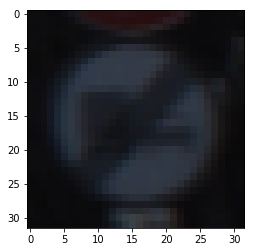

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Randomly select the image from dataset and disply the image 
index = random.randint(0, len(X_train))
image=X_train[index]
print(y_train[index])
plt.figure()
plt.imshow(image)

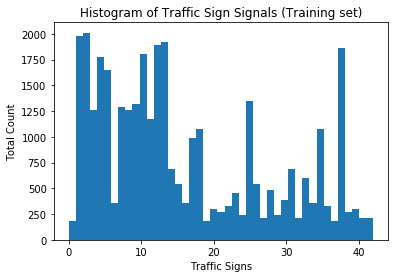

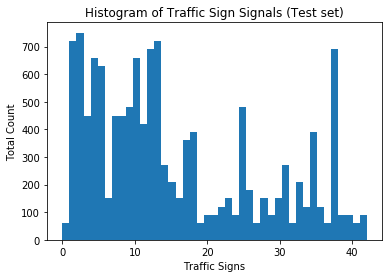

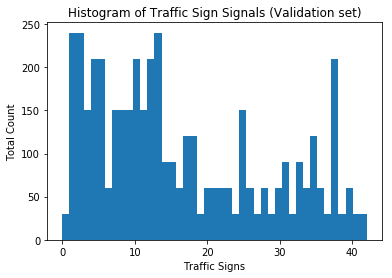

In [4]:
# Plot the histogram of traffic sign signals for training data
plt.hist(y_train, bins=classes_num)
plt.title('Histogram of Traffic Sign Signals (Training set)') # Display the title 
plt.xlabel('Traffic Signs') # Display the x-axis
plt.ylabel('Total Count')   # Display the y-axis
plt.show()                  # Plot the histogram

# Plot the histogram of traffic sign signals for test data
plt.hist(y_test, bins=classes_num)
plt.title('Histogram of Traffic Sign Signals (Test set)') # Display the title 
plt.xlabel('Traffic Signs') # Display the x-axis
plt.ylabel('Total Count')   # Display the y-axis
plt.show()                  # Plot the histogram

# Plot the histogram of traffic sign signals for validation data
plt.hist(y_valid, bins=classes_num)
plt.title('Histogram of Traffic Sign Signals (Validation set)') # Display the title 
plt.xlabel('Traffic Signs') # Display the x-axis
plt.ylabel('Total Count')   # Display the y-axis
plt.show()                  # Plot the histogram

#### Number of Images in each category

In [5]:
label = pd.read_csv('signnames.csv')

num_img_category = np.zeros(classes_num)

for i in range(0, len(y_train)):
    num_img_category[y_train[i]] += 1

# print the total count of images in each category 
for i in range(0, classes_num):
    print("{:2d}".format(i), "\t Count := " + str(num_img_category[i]),
          "\t Traffic Sign := " + label.loc[i, 'SignName'], 
          )

 0 	 Count := 180.0 	 Traffic Sign := Speed limit (20km/h)
 1 	 Count := 1980.0 	 Traffic Sign := Speed limit (30km/h)
 2 	 Count := 2010.0 	 Traffic Sign := Speed limit (50km/h)
 3 	 Count := 1260.0 	 Traffic Sign := Speed limit (60km/h)
 4 	 Count := 1770.0 	 Traffic Sign := Speed limit (70km/h)
 5 	 Count := 1650.0 	 Traffic Sign := Speed limit (80km/h)
 6 	 Count := 360.0 	 Traffic Sign := End of speed limit (80km/h)
 7 	 Count := 1290.0 	 Traffic Sign := Speed limit (100km/h)
 8 	 Count := 1260.0 	 Traffic Sign := Speed limit (120km/h)
 9 	 Count := 1320.0 	 Traffic Sign := No passing
10 	 Count := 1800.0 	 Traffic Sign := No passing for vehicles over 3.5 metric tons
11 	 Count := 1170.0 	 Traffic Sign := Right-of-way at the next intersection
12 	 Count := 1890.0 	 Traffic Sign := Priority road
13 	 Count := 1920.0 	 Traffic Sign := Yield
14 	 Count := 690.0 	 Traffic Sign := Stop
15 	 Count := 540.0 	 Traffic Sign := No vehicles
16 	 Count := 360.0 	 Traffic Sign := Vehicles over

### Pre-process the Data Set (normalization, grayscale, etc.)

Initial step followed in data pre-processing is to shuffle the data. It is very important to shuffle the training data otherwise ordering of data might have huge effect on how the network trends (Neural Network training).

In [6]:
# Import library to shuffle the data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train) # Shuffle training data
X_valid, y_valid = shuffle(X_valid, y_valid) # Shuffle validation data
X_test, y_test = shuffle(X_test, y_test)     # Shuffle test data

The image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - pixel_mean)/ (max_pixel-min_pixel)` is used to normalize the data. After normalization pixel values will be in the range -1 to +1.
Other method used in normalizing the data is `(pixel - 128)/ 128`.

In [7]:
import numpy as np

#Nomralisation
X_train = (X_train-X_train.mean())/(np.max(X_train)-np.min(X_train)) # Apply Normalization to training data
X_valid = (X_valid-X_valid.mean())/(np.max(X_valid)-np.min(X_valid)) # Apply Normalization to validation data
X_test = (X_test-X_test.mean())/(np.max(X_test)-np.min(X_test))      # Apply Normalization to test data

print("Min pixel value in normalized train dataset", np.amin(X_train[0]))
print("Max pixel value in normalized train dataset", np.amax(X_train[0]))

Min pixel value in normalized train dataset -0.234029760929
Max pixel value in normalized train dataset 0.675774160639


### Model Architecture

LeNet Architecture is used to build the Traffic Sign Classifier model. It includes two Convolutional Layers and three Fully-Connected layers.

EPOCH and BATCH SIZE values affects the training speed and model accuracy.
EPOCH variable is used to tell the TensorFlow how many times to run our training data through the network. More number of EPOCHS results in better model training but it takes longer time to train the network.

BATCH_SIZE variable is used to tell the TensorFlow how many training images to run through the network at a time. If the BATCH_SIZE is larger, the model gets trained faster but our processor may have a memory limit on how large a batch it can run.

#### Dimesionality
The number of neurons of each layer in our CNN can be calculated by using below formula,

output_height = [(input_height - filter_height + 2 * padding) / vertical_stride] + 1

output_width = [(input_width - filter_width + 2 * padding) / vertical_stride] + 1

output_depth = number of filters

In [8]:
# Import libraries
import tensorflow as tf # Import tensorflow library
from tensorflow.contrib.layers import flatten # Flattens the input layer

EPOCHS = 50            # Number of epochs
BATCH_SIZE = 128       # Batch size
learning_rate = 0.001  # Learning rate tells the TensorFlow how quickly to update the network weights

# Hyperparameters
# Both these parameters relate to how we initialze our weights.
mu = 0
sigma = 0.1

# Define LeNet architecture
def LeNet(x): 
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # Use 5X5 filter with an input depth of 3 and an output depth of 6. 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    # Initialize the bias
    conv1_b = tf.Variable(tf.zeros(6))
    # Use conv2D function to convolve the filter over images and add bias at the end.
    # y = x*W+b
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    #output_height = [(32-5+2*0)/1]+1 = 28.
    #output_width = [(32-5+2*0)/1]+1 = 28.
    #output_depth = filter_depth = 6
    
    # Activation 1.
    conv1 = tf.nn.relu(conv1) # Activate the output of the convolutional layer using ReLU activation function

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    # Pool the output using 2x2 kernel with a 2x2 stride 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID') 
    
    #output_height = 28/2 = 14.
    #output_width = 28/2 = 14.
    #output_depth = 6
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = 0, stddev = 0.1))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #output_height = [(14-5+2*0)/1]+1 = 10.
    #output_width = [(14-5+2*0)/1]+1 = 10.
    #output_depth = filter_depth = 16
    
    # Activation 2.
    conv2 = tf.nn.relu(conv2) # Activate the output of the convolutional layer using ReLU activation function

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    # Pool the output using 2x2 kernel with a 2x2 stride 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #output_height = 10/2 = 5.
    #output_width = 10/2 = 5.
    #output_depth = 16
    
    # Flatten the output into a vector. Input = 5x5x16. Output=5x5x16=400.
    flattened   = flatten(conv2)  
    
     # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(flattened, fc1_W) + fc1_b
    
    # Fully connected layer activation 1.
    fc1    = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Full connected layer activation 2.
    fc2    = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    # Set the output with a width equal to number of classes in our label set. These outrputs are called as logits.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels

In [9]:
# x is a placeholder that will store our input batches
# batch_size=None allows the placeholder to later accept the batch of any size
# set the image dimensions to 32x32x3
# In this case, our labels come through sparse variables, which means they are integers. They are not one-hot encoded yet.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
# y is a placeholder that will store our output batches (y stores the labels)
y = tf.placeholder(tf.int32, (None))

# One-hot encode the labels
one_hot_y = tf.one_hot(y, 43) # Number of outputs = 43

### Training Pipeline
Create a training pipeline that uses the model to classify traffic sign images.

In [10]:
# Pass the input data to the LeNet function to calculate our logits
logits = LeNet(x)

# 'tf.nn.softmax_cross_entropy_with_logits' function is used to compare the logits to the ground truth training labels and 
# calculate the cross entropy. Cross Entropy is just a measure of how different the logits are from the ground truth training labels.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# 'tf.reduce_mean' function averages the cross entropy from all of the training images
loss_operation = tf.reduce_mean(cross_entropy)

# Adam Optimizer uses the Adam algorithm to minimize the loss function using learning rate.
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

# Run the minimize function on the optimizer which uses back-propagation to update the network and minimize our training loss.
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the model the loss and accuracy of the model for a given dataset.

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
# Measure whether given prediction is correct by comparing logit prediction to the one-hot encoded ground truth label.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# Calculte the model's overall accuracy by averaging the individual prediction accuracies.
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    # Break the training data into batches and train the model on each batch.
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE] # batch the dataset
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y}) # run through evaluation pipeline
        total_accuracy += (accuracy * len(batch_x)) # Calculate the avarage accuracy of each batch to calculate the total accuracy of the model
        total_loss += (loss * len(batch_x))
    return total_accuracy/num_examples

### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch shuffle the training set to ensure that our training is not biased by the order of the images.

Break the training data into batches and train the model on each batch.

At the end of each epoch, we evaluate the model on our validation data.

Once we have completly trained the model, save it. We can load it later or modify it or evaluate our model on test datset.

In [12]:
# Create TensorFlow session and initialize variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    # Train over 'N' number of epochs
    for i in range(EPOCHS):
        # Before each epoch shuffle the training set.
        X_train, y_train = shuffle(X_train, y_train)
        # Break the training data into batches and train the model on each batch.
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        # At the end of each epoch, we evaluate the model on our validation data
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    # Save the model after the completion of training.
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.701

EPOCH 2 ...
Validation Accuracy = 0.814

EPOCH 3 ...
Validation Accuracy = 0.850

EPOCH 4 ...
Validation Accuracy = 0.874

EPOCH 5 ...
Validation Accuracy = 0.888

EPOCH 6 ...
Validation Accuracy = 0.896

EPOCH 7 ...
Validation Accuracy = 0.876

EPOCH 8 ...
Validation Accuracy = 0.896

EPOCH 9 ...
Validation Accuracy = 0.901

EPOCH 10 ...
Validation Accuracy = 0.886

EPOCH 11 ...
Validation Accuracy = 0.900

EPOCH 12 ...
Validation Accuracy = 0.905

EPOCH 13 ...
Validation Accuracy = 0.898

EPOCH 14 ...
Validation Accuracy = 0.889

EPOCH 15 ...
Validation Accuracy = 0.908

EPOCH 16 ...
Validation Accuracy = 0.915

EPOCH 17 ...
Validation Accuracy = 0.919

EPOCH 18 ...
Validation Accuracy = 0.914

EPOCH 19 ...
Validation Accuracy = 0.906

EPOCH 20 ...
Validation Accuracy = 0.905

EPOCH 21 ...
Validation Accuracy = 0.908

EPOCH 22 ...
Validation Accuracy = 0.912

EPOCH 23 ...
Validation Accuracy = 0.923

EPOCH 24 ...
Validation Accura

As we train the model, we see that validation accuracy starts off really high and stays there. This is the result of the powerful Convolutional Network Acrchitecture LeNet and because of the choice hyperparameters.

### Evalute the Model
Evalate the performance of the model on test set. This has to be done only once after the completion of training. Otherwise, we would be using the test dataset to choose the best model and then the test dataset would not provide a good estimate of how well the model would do in the real world.

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.928


---

## Step 3: Test a Model on New Images

To give more insight into how the model is working, five pictures of German traffic signs are downloded from the web and the model is used to predict the traffic sign type.

We can find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load the Images

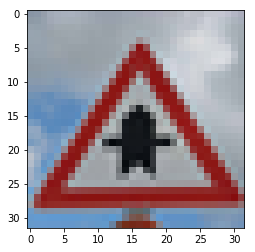

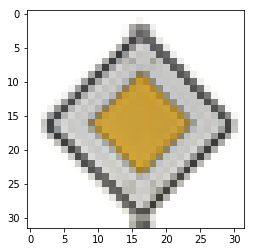

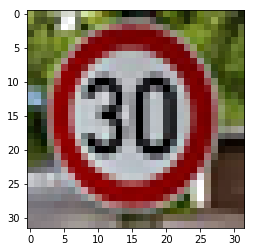

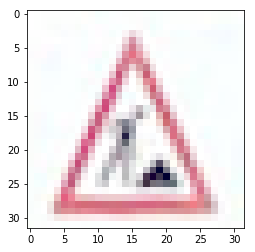

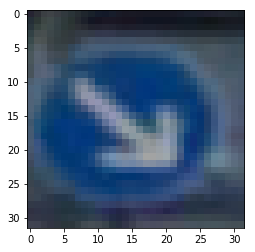

In [14]:
### Import the libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# List of test images
x_test_images = ['test_images/1.png', 'test_images/2.png', 'test_images/3.png', 'test_images/4.png', 'test_images/5.png']
y_new_test = np.array([11,12,1,25,38])

imgs = []
    
for i in range(0,len(x_test_images)):
    img = mpimg.imread(x_test_images[i])
    imgs.append(cv2.cvtColor(cv2.imread(x_test_images[i]), cv2.COLOR_BGR2RGB))
    plt.imshow(img)
    plt.figure()

# Create an array of images
X_new_test =  np.asarray(imgs)    

# Normalize the test data
X_new_test = (X_new_test-X_new_test.mean())/(np.max(X_new_test)-np.min(X_new_test))

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
# set the batch size to 64
batch_size = 64
result = None

# Read the sign id and name from csv file
sign_names = pd.read_csv('signnames.csv', names=['id', 'name'], header=0)

# Function to evaluate the prediction
def evaluate_prediction(X_new_test, batch_size):
    sess = tf.get_default_session()
    steps_per_epoch = len(X_new_test) // batch_size + (len(X_new_test)%batch_size > 0)
    predictions = np.zeros((len(X_new_test), classes_num))
    for step in range(steps_per_epoch):
        batch_x = X_new_test[step*batch_size:(step+1)*batch_size]
        batch_y = np.zeros((len(batch_x), classes_num))
        prediction = sess.run(tf.nn.softmax(logits), feed_dict={x: batch_x})
        predictions[step*batch_size:(step+1)*batch_size] = prediction
    return predictions

# Create tensorflow session
with tf.Session() as sess:
    # Restore the model which was saved earlier
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = evaluate_prediction(X_new_test, batch_size)
    result = sess.run(tf.nn.top_k(tf.constant(prediction),k=5))
    values, indices = result
    for each in indices:
        print('{} -- {}'.format(each[0], sign_names.name[each[0]]))


INFO:tensorflow:Restoring parameters from ./lenet
11 -- Right-of-way at the next intersection
12 -- Priority road
2 -- Speed limit (50km/h)
25 -- Road work
38 -- Keep right


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy = sess.run(accuracy_operation, feed_dict={
        x: X_new_test,
        y: y_new_test,
    })

    print('Accuracy: {:.3f}'.format(accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy: 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
for i, img in enumerate(X_new_test):
    correct = label.loc[y_new_test[i], 'SignName']
    print('True Label is --> {:>5}:{:<30}'.format(y_new_test[i], correct))
    print("")
    for j, k in zip(indices[i], values[i]):
        name = label.loc[j, 'SignName']
        print('{:>5}: {:<30} {:>3.3f}%'.format(j, name, k*100.0))
    
    print("##############################################")
    print("##############################################")

True Label is -->    11:Right-of-way at the next intersection

   11: Right-of-way at the next intersection 100.000%
   30: Beware of ice/snow             0.000%
   21: Double curve                   0.000%
    7: Speed limit (100km/h)          0.000%
   31: Wild animals crossing          0.000%
##############################################
##############################################
True Label is -->    12:Priority road                 

   12: Priority road                  100.000%
   10: No passing for vehicles over 3.5 metric tons 0.000%
   42: End of no passing by vehicles over 3.5 metric tons 0.000%
    5: Speed limit (80km/h)           0.000%
   11: Right-of-way at the next intersection 0.000%
##############################################
##############################################
True Label is -->     1:Speed limit (30km/h)          

    2: Speed limit (50km/h)           100.000%
    1: Speed limit (30km/h)           0.000%
    3: Speed limit (60km/h)           0.000

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [18]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")